In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### read in model performance csv

In [22]:
#df_losses = pd.read_csv('../test_output/imt_model_losses_13_structures.csv')
df_losses = pd.read_csv('../../../test_output/imt_model_losses_13_structures.csv').sort_values(by='target')

df_losses = df_losses.sort_values(['target'])
df_losses

,trans_modality,target,path_model,path_dataset,l1_norm_test,l1_test,l2_norm_test,l2_test,n_count_test,l1_norm_train,l1_train,l2_norm_train,l2_train,n_count_train
1,bf,beta actin,saved_models/ttf_beta_actin_latest.p,data/dataset_saves/ttf_beta_actin_latest.ds,0.802528,0.642311,0.649086,0.706948,15.0,0.519982,0.398974,0.285423,0.283468,15.0
2,bf,desmoplakin,saved_models/ttf_desmoplakin_latest.p,data/dataset_saves/ttf_desmoplakin_latest.ds,1.010593,0.542516,1.009571,0.859759,15.0,0.933593,0.469695,0.662656,0.585145,15.0
0,bf,dna,saved_models/ttf_bf_dna_nohotscombo_30.p,data/dataset_saves/ttf_bf_dna_nohotscombo.ds,0.804543,0.640806,0.566676,0.776132,15.0,0.610241,0.475309,0.253647,0.339333,15.0
5,bf,fibrillarin,saved_models/ttf_fibrillarin_latest.p,data/dataset_saves/ttf_fibrillarin_latest.ds,0.727759,0.328777,0.339071,0.499788,15.0,0.498604,0.227424,0.057407,0.083663,15.0
4,dic,lamin,saved_models/ttf_dic_struct.p,data/dataset_saves/ttf_dic_struct.ds,0.781259,0.588167,0.464086,0.716930,15.0,0.653560,0.505151,0.270599,0.436074,15.0
6,bf,lamin,saved_models/ttf_lamin_b1_latest.p,data/dataset_saves/ttf_lamin_b1_latest.ds,0.778896,0.596849,0.511970,0.807452,15.0,0.481482,0.375894,0.135251,0.227311,15.0
3,dic,membrane,saved_models/ttf_dic_memb.p,data/dataset_saves/ttf_dic_memb.ds,0.901189,0.646662,0.729096,0.977520,14.0,0.537156,0.381580,0.196237,0.253139,15.0
12,bf,membrane,saved_models/ttf_memb_no_hots_00.p,data/dataset_saves/ttf_memb_no_hots.ds,0.993865,0.711673,0.897412,0.854426,3.0,0.787543,0.469878,0.500156,0.333257,15.0
7,bf,myosin iib,saved_models/ttf_myosin_iib_latest.p,data/dataset_saves/ttf_myosin_iib_latest.ds,0.976848,0.494449,0.884091,0.898056,15.0,0.554246,0.307445,0.131018,0.164544,15.0
8,bf,sec61,saved_models/ttf_sec61_beta_latest.p,data/dataset_saves/ttf_sec61_beta_latest.ds,0.873259,0.711156,0.669563,0.837907,15.0,0.540281,0.434407,0.239844,0.290261,15.0


### make bar graphs

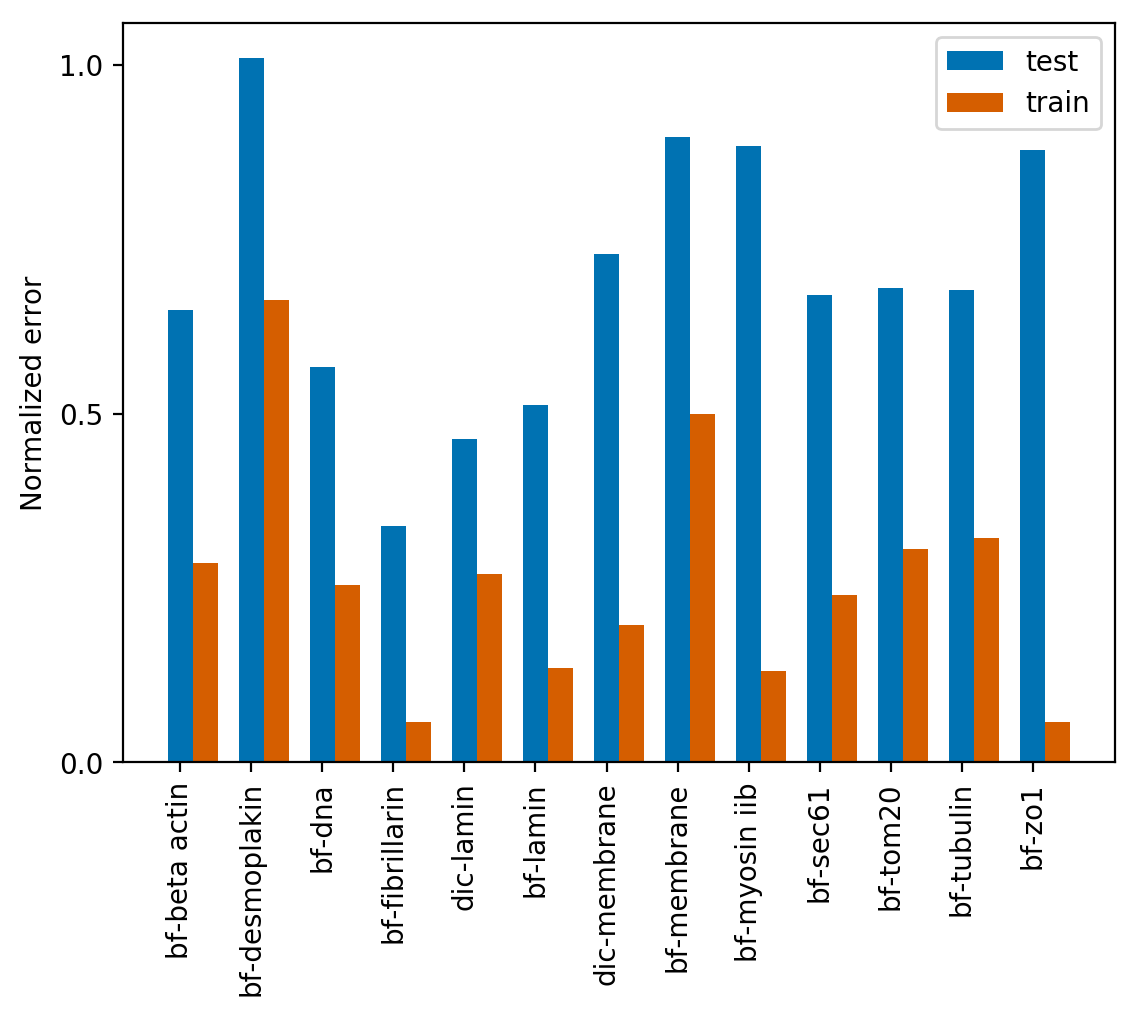

In [23]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.dpi = 200
width = 0.35
legend_loc = (0.32, 0.8)

x_labels = df_losses['trans_modality'] + '-' + df_losses['target']
#df_losses.plot.bar(x=x_labels, y='l2_test', ax=ax)
ind = np.arange(x_labels.size)
ax.bar(ind, df_losses['l2_norm_test'], width=width, color='#0072b2')
ax.bar(ind+width, df_losses['l2_norm_train'], width=width, color='#d55e00')

ax.set_xticks(range(x_labels.size))
ax.set_xticklabels(x_labels, rotation='vertical')
ax.set_yticks([0.0, 0.5, 1.0])
plt.ylabel('Normalized error')
ax.legend(['test', 'train'])

In [7]:
ind

range(0, 13)